<a href="https://colab.research.google.com/github/Rizwana605/Array/blob/main/malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = {
    "size_in_kb":  [500, 1200, 300, 2600, 140, 4500, 230, 1900],
    "entropy":     [3.2, 7.8, 2.1, 8.9, 1.9, 9.2, 2.3, 8.5],
    "api_calls":   [12, 112, 8, 150, 6, 180, 10, 130],
    "sections":    [5, 8, 4, 10, 3, 12, 4, 9],
    "label":       [0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
print("Dataset:")
display(df)
X = df.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Test Predictions:", pred)
print("Accuracy:", accuracy_score(y_test, pred))
print("\nMalware Prediction")
size = float(input("Enter file size (KB): "))
entropy = float(input("Enter entropy value (1–10): "))
api = int(input("Enter number of suspicious API calls: "))
sec = int(input("Enter number of sections: "))
user_data = [[size, entropy, api, sec]]
user_pred = model.predict(user_data)
if user_pred[0] == 1:
    print("\nRESULT: This file is MALICIOUS!")
else:
    print("\nRESULT: This file looks SAFE!")


Dataset:


,size_in_kb,entropy,api_calls,sections,label
0,500,3.2,12,5,0
1,1200,7.8,112,8,1
2,300,2.1,8,4,0
3,2600,8.9,150,10,1
4,140,1.9,6,3,0
5,4500,9.2,180,12,1
6,230,2.3,10,4,0
7,1900,8.5,130,9,1


Test Predictions: [1 1]
Accuracy: 1.0

Malware Prediction
Enter file size (KB): 500
Enter entropy value (1–10): 5
Enter number of suspicious API calls: 12
Enter number of sections: 10

RESULT: This file looks SAFE!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
df.shape[1]

5

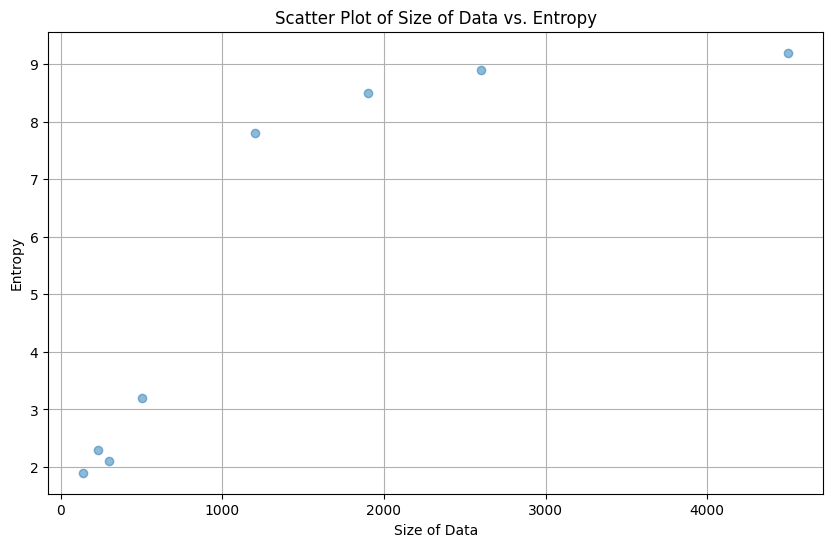

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['size_in_kb'], df['entropy'], alpha=0.5)
plt.title('Scatter Plot of Size of Data vs. Entropy')
plt.xlabel('Size of Data')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()